<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Procesamiento digital de imágenes

 </center></font></h1>
<h2><font color='0B5345'> <center>
Primer taller: Manipulación de archivos y visualización</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

<h3><font color='0B5345'> <center>
Isabella Ariza Cuberos</center></font></h3>
<font  face="Courier New" size="3">

INTEGRANTES:
ANDRES DAVID MEDINA HERRERA 
JUAN JOSÉ RAMÍREZ CUERVO 
-_____


**Carga y visualización de Imágenes Médicas**

**Descripción:**

Este proyecto tiene como objetivo desarrollar un flujo para la carga y visalización de imágenes médicas en formato DICOM y NIfTI. La aplicación realizará las siguientes tareas:

1. **Cargar y Mostrar Información de Imágenes DICOM:** (30%)
   - Cargar imágenes médicas en formato DICOM desde una carpeta especificada.
   - Mostrará la información relevante de cada imagen, incluyendo el nombre del paciente, modalidad, descripción del estudio y fecha de adquisición en formato día, mes y año.


2. **Anonimización de Datos Sensibles:** (40%)
   - Seleccionar al menos cuatro datos sensibles (por ejemplo, nombre del paciente, ID, fecha de nacimiento, etc.) que serán anonimizados.
   - Se implementará un proceso de anonimización para todos los datos seleccionados en todas las imágenes de la carpeta.
   - Las nuevas imágenes anonimizadas se guardarán en una carpeta designada.

3. **Visualización de Imágenes NIfTI:** (20%)
   - Cargar y visualizar una imagen en formato NIfTI, si la tiene en formato dicom la deberá convertir con dcm2nifti.
   - Se debe visualizar la imagen en los tres planos (axial, sagital, coronal) o en un plano específico.
4. **Presentación y estructura:** (10%)
   - Orden en el código
   - Implementar el uso de estructuras de control cíclicas
   - Tenga en cuenta que cada media hora de retraso, se penalizará con un 0.5 en la nota final

**Entregables:**
- Código fuente del programa en Python.

CONDIGO FUENTE DEL PROGRAMA:

1. **Cargar y Mostrar Información de Imágenes DICOM:** (30%)
   - Cargar imágenes médicas en formato DICOM desde una carpeta especificada.
   - Mostrará la información relevante de cada imagen, incluyendo el nombre del paciente, modalidad, descripción del estudio y fecha de adquisición en formato día, mes y año.

In [1]:
#REALIZAMOS PRIMERO LAS IMPORTACIONES DE LAS LIBRERIAS QUE NECESITAREMOS
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_file
from pydicom import dcmread
import os

In [2]:
#Leemos los archivos desde la carpeta, se espera que la carpeta se encuentre en el mismo directorio que el .py
path = './Data' #Carpeta donde se encuentran los archivos .dcm
ct_images=os.listdir(path) #extraigo una lista con el nombre de todos los archivos
imageOne=ct_images[0]#nombre del primer elemento de la lista
path_imageOne=path+'/'+imageOne
dcm_data = pydicom.dcmread(path_imageOne)
dcm_data


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 254
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.33578374987392465461351768963508701
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.9.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.9'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.3357837498739246546135176

In [3]:
#Extraida la informacion de la primera imagen, se debe recordar que la metadata es la misma para el resto de imagenes
#POR LO CUAL EL PROCESO DE VISUALIZACION DE LOS DATOS SE HARA MEERAMENTE CON LA ENCONTRADA EN LA PRIMERA IMAGEN:
# Extraer información de la metadata
nombre_paciente = dcm_data.PatientName
modalidad = dcm_data.Modality
descripcion_estudio = dcm_data.StudyDescription
fecha_adquisicion = dcm_data.StudyDate

# Formatear la fecha de adquisición (en formato YYYYMMDD) a día, mes y año
anio = fecha_adquisicion[0:4]
mes = fecha_adquisicion[4:6]
dia = fecha_adquisicion[6:8]

# Imprimir la información obtenida
print("Nombre del paciente:", nombre_paciente)
print("Modalidad:", modalidad)
print("Descripción del estudio:", descripcion_estudio)
print("Fecha de adquisición:", f"{dia}-{mes}-{anio}")

Nombre del paciente: CN_0234
Modalidad: MR
Descripción del estudio: BRAIN MRI
Fecha de adquisición: 24-10-2022


2. **Anonimización de Datos Sensibles:** (40%)
   - Seleccionar al menos cuatro datos sensibles (por ejemplo, nombre del paciente, ID, fecha de nacimiento, etc.) que serán anonimizados.
   - Se implementará un proceso de anonimización para todos los datos seleccionados en todas las imágenes de la carpeta.
   - Las nuevas imágenes anonimizadas se guardarán en una carpeta designada.

In [6]:
#Los 4 datos que se consideraron sensibles y por ende a anonimizar son:
#NOMBRE DEL PACIENTE,ID, FECHA DE NACIMIENTO Y FECHA Y HORA DEL ESTUDIO.

#creamos la siguiente funcion de anonimizado para facilitar el proceso:
def anonimizar(imagenDICOM,ImagenName):
    imagenDICOM['PatientName'].value='anonimo'
    imagenDICOM['PatientID'].value='anonimo'
    imagenDICOM['PatientBirthDate'].value='anonimo'
    imagenDICOM['StudyDate'].value='anonimo'
    #Guardado en carpeta
    carpeta_anonimizada = './DatosAnonimizados'

    if not os.path.exists(carpeta_anonimizada):
        os.makedirs(carpeta_anonimizada)
    ruta_anonimizada = os.path.join(carpeta_anonimizada, ImagenName[:-4]+'Anonimizada'+'.dcm')
    imagenDICOM.save_as(ruta_anonimizada)
#probamos el proceso de anonimizado 

anonimizar(dcm_data,imageOne)

In [9]:
path = './DatosAnonimizados' #Carpeta donde se encuentran los archivos .dcm
ct_images=os.listdir(path) #extraigo una lista con el nombre de todos los archivos
imageOne=ct_images[0]#nombre del primer elemento de la lista
path_imageOne=path+'/'+imageOne
dcm_data1 = pydicom.dcmread(path_imageOne)
dcm_data1

nombre_paciente = dcm_data1.PatientName
fecha_nacimiento=dcm_data1.PatientBirthDate
id=dcm_data1.PatientID
fecha_adquisicion = dcm_data1.StudyDate

# Imprimir la información obtenida
print("Nombre del paciente:", nombre_paciente)
print("Id:", id)
print("Fecha nacimiento:", fecha_nacimiento)
print("Fecha de adquisición:", fecha_adquisicion)

Nombre del paciente: anonimo
Id: anonimo
Fecha nacimiento: anonimo
Fecha de adquisición: anonimo


COMO SE OBSERVA, SE CREÓ UNA NUEVA CARPETA Y SE AÑADIO  LA DATA ANONIMIZADA EN ELLA, AHORA, SE RECOMIENDA ELIMINAR EL ARCHIVO QUE SE GENERÓ EN LA CELDA ANTERIOR DEBIDO A QUE LA SIGUIENTE CELDA EJECUTARÁ UN FOR QUE APLICARÁ LA FUNCION A TODAS LAS IMAGENES QUE SE TIENEN:

In [10]:
path = './Data' #Carpeta donde se encuentran los archivos .dcm
ct_images=os.listdir(path) #extraigo una lista con el nombre de todos los archivos
for imag in ct_images:
    path_imageOne=path+'/'+imag
    dcm = pydicom.dcmread(path_imageOne)
    anonimizar(dcm,imag)
    

C:\Users\ADMH2\AppData\Roaming\Python\Python311\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR DA: 'anonimo'.
  warnings.warn(msg)


3. **Visualización de Imágenes NIfTI:** (20%)
   - Cargar y visualizar una imagen en formato NIfTI, si la tiene en formato dicom la deberá convertir con dcm2nifti.
   - Se debe visualizar la imagen en los tres planos (axial, sagital, coronal) o en un plano específico.

In [2]:
# Importamos la librería
import dicom2nifti

# Ruta del directorio que contiene los archivos DICOM
dicom_directory = r"Data"

if not os.path.exists('Data_nifti'):
        os.makedirs('Data_nifti')
# Ruta donde se guardarán los archivos NIfTI
nifti_directory = r"Data_nifti"

# Función para la conversión de formato
dicom2nifti.convert_directory(dicom_directory,nifti_directory)

PARA VISUALIZAR LAS IMAGENES

In [6]:
import nilearn
from nilearn import plotting,image
import matplotlib.pyplot as plt

ar = os.listdir('./Data_nifti')[0]

img=os.path.join('./Data_nifti', ar)
img1=nilearn.image.load_img(img)

C:\Users\ADMH2\AppData\Roaming\Python\Python311\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


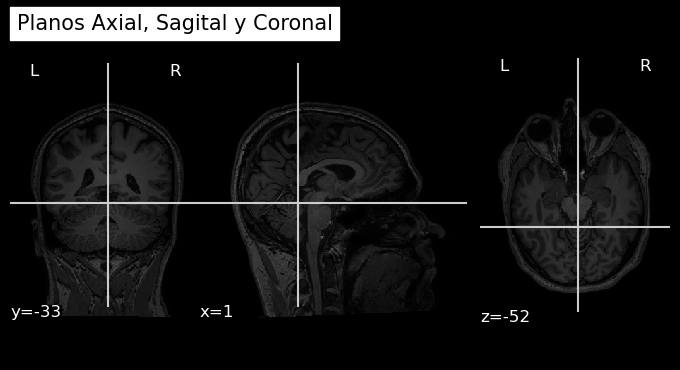

In [7]:
# Cargar una imagen NIfTI de ejemplo usamos una imagen de ejemplo 
from nilearn.datasets import load_mni152_template
img = load_mni152_template()

plotting.plot_anat(img1, display_mode='ortho', title='Planos Axial, Sagital y Coronal')

plt.show()